In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import plotly.express as px
from scipy.stats import chi2_contingency, f_oneway, jarque_bera, probplot

In [ ]:
df_final = pd.read_csv("final_data.csv")

In [ ]:
df_final.sample(10)

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
9664,Pakistan,England,Dubai,60,52,6,5.294118,34.0,129
53456,Australia,England,Bridgetown,179,14,5,10.132075,47.0,201
34927,West Indies,India,Providence,109,23,5,6.742268,41.0,146
14682,South Africa,Australia,Durban,63,67,6,7.132075,26.0,164
993,West Indies,South Africa,Centurion,125,63,9,13.157895,76.0,258
33578,India,Pakistan,Johannesburg,130,12,5,7.222222,28.0,157
52135,India,New Zealand,Mount Maunganui,55,78,9,7.857143,39.0,163
3924,West Indies,England,Bristol,39,89,9,7.548387,38.0,196
31251,India,England,Kolkata,28,85,7,4.800000,27.0,120
51433,Australia,Pakistan,Dubai,85,43,4,6.623377,24.0,108


In [ ]:
df_final.isnull().sum()

,0
batting_team,0
bowling_team,0
city,0
current_score,0
balls_left,0
wickets_left,0
crr,0
last_five,0
runs_x,0


In [ ]:
df_final.duplicated().sum()

np.int64(153)

In [ ]:
df_final[df_final.duplicated()]

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
6193,England,West Indies,Bridgetown,34,71,5,4.163265,24.0,103
6865,Australia,South Africa,Melbourne,86,71,9,10.530612,48.0,182
6952,West Indies,Australia,Abu Dhabi,81,53,6,7.253731,30.0,157
7768,West Indies,Australia,Gros Islet,38,71,7,4.653061,27.0,145
13352,England,Australia,Cape Town,35,83,9,5.675676,31.0,135
...,...,...,...,...,...,...,...,...,...
71223,India,Sri Lanka,Rajkot,53,83,8,8.594595,46.0,228
71284,England,Zimbabwe,Cape Town,159,23,5,9.835052,52.0,188
71363,England,Sri Lanka,Sharjah,59,53,7,5.283582,23.0,163
71640,West Indies,South Africa,Johannesburg,78,71,10,9.551020,49.0,205


In [ ]:
df_final.dtypes

,0
batting_team,object
bowling_team,object
city,object
current_score,int64
balls_left,int64
wickets_left,int64
crr,float64
last_five,float64
runs_x,int64


In [ ]:
num_cols = df_final.columns[[3,4,5,6,7,8]].tolist()
cat_cols = [col for col in df_final.columns.tolist() if col not in num_cols]

In [ ]:
df_final[num_cols].describe()

,current_score,balls_left,wickets_left,crr,last_five,runs_x
count,71885.000000,71885.000000,71885.000000,71885.000000,71885.000000,71885.000000
mean,96.489615,45.837421,6.713153,7.748826,39.429631,163.720915
std,43.092802,26.573350,2.013985,1.821286,11.991435,33.803170
min,10.000000,0.000000,0.000000,1.935484,9.000000,44.000000
25%,62.000000,23.000000,5.000000,6.483871,31.000000,141.000000
50%,91.000000,46.000000,7.000000,7.670886,38.000000,164.000000
75%,126.000000,69.000000,8.000000,8.857143,47.000000,187.000000
max,283.000000,98.000000,10.000000,16.600000,94.000000,283.000000


In [ ]:
(
    df_final
    .assign(**{
        col: df_final[col].astype("object")
        for col in cat_cols
    })
    .describe(include="object")
    .T
)

,count,unique,top,freq
batting_team,71885,10,Pakistan,10275
bowling_team,71885,10,England,9540
city,71885,59,Colombo,4007


In [ ]:
def numerical_analysis(dataframe, column_name, cat_col= None, bins="auto"):
  # create the figure
  fig=plt.figure(figsize=(15,10))

  #do the layout
  grid= GridSpec(ncols=2, nrows=2, figure=fig)

  # set subplots
  ax1= fig.add_subplot(grid[0,0])
  ax2= fig.add_subplot(grid[0,1])
  ax3= fig.add_subplot(grid[1,:])

  # kde plot
  sns.kdeplot(data=dataframe, x=column_name, hue=cat_col, ax=ax1)

  # box plot
  sns.boxplot(data=dataframe, x=column_name, hue=cat_col, ax=ax2)

  # histogram
  sns.histplot(data=dataframe, x=column_name, bins=bins, hue=cat_col, kde=True, ax=ax3)
  plt.tight_layout()
  plt.show()



def numerical_categorical_analysis(dataframe, cat_column_1, num_column):
  fig, (ax1,ax2) = plt.subplots(2,2,figsize=(15,7.5))

  # bar plot
  sns.barplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax1[0])

  # boxplot
  sns.boxplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax1[1])

  # violin plot
  sns.violinplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax2[0])

  # strip plot
  sns.stripplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax2[1])

  plt.tight_layout()
  plt.show()



def categorical_analysis(dataframe, column_name):
    # print the values counts of categories
    display(
        pd.DataFrame({
            "Count": (
                dataframe[column_name]
                .value_counts()),
            "Percentage": (
                dataframe[column_name]
                .value_counts(normalize=True)
                .mul(100)
                .round(2)
                .astype("str")
                .add("%")
                )
        })
    )
    print("*" * 50)
    # get unique categories
    unique_categories = dataframe[column_name].unique().tolist()
    number_of_categories = dataframe[column_name].nunique()
    print(f"The unique categories in {column_name} column are {unique_categories}")
    print("*" * 50)
    print(f"The number of categories in {column_name} column are {number_of_categories}")
    # plot countplot
    sns.countplot(data=dataframe, x=column_name)
    plt.xticks(rotation=45)
    plt.show()



def multivariate_analysis(dataframe, num_column, cat_column_1, cat_column_2):
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,7.5))
    # barplot
    sns.barplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, ax=ax1[0])
    # boxplot
    sns.boxplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, gap=0.1, ax=ax1[1])
    # violin plot
    sns.violinplot(data=dataframe, x=cat_column_1, gap=0.1,
                   y=num_column,hue=cat_column_2, ax=ax2[0])
    # strip plot
    sns.stripplot(data=dataframe, x=cat_column_1,
                  y=num_column,hue=cat_column_2,dodge=True,ax=ax2[1])
    plt.tight_layout()
    plt.show()

def chi_2_test(dataframe, col1, col2, alpha= 0.05):
    data = (
        dataframe.loc[:, [col1, col2]]
        .dropna()
    )
    # create contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])
    # perform chi-squared test
    _, p_val, _, _ = chi2_contingency(contingency_table)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant association between {col1} and {col2}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant association between {col1} and {col2}.")

def anova_test(dataframe, num_col, cat_col, alpha=0.05):
    data = (
        dataframe.loc[:, [num_col, cat_col]]
        .dropna()
    )
    cat_group = data.groupby(cat_col)
    groups = [group[num_col].values for _, group in cat_group]
    f_stat, p_val = f_oneway(*groups)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant relationship between {num_col} and {cat_col}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant relationship between {num_col} and {cat_col}.")

def test_for_normality(dataframe, column_name, alpha=0.05):
    data = dataframe[column_name]
    print("Jarque Bera Test for Normality")
    _, p_val = jarque_bera(data)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. The data is not normally distributed.")
    else:
        print(f"Fail to reject the null hypothesis. The data is normally distributed.",end="\n\n")

## Target Col - Run

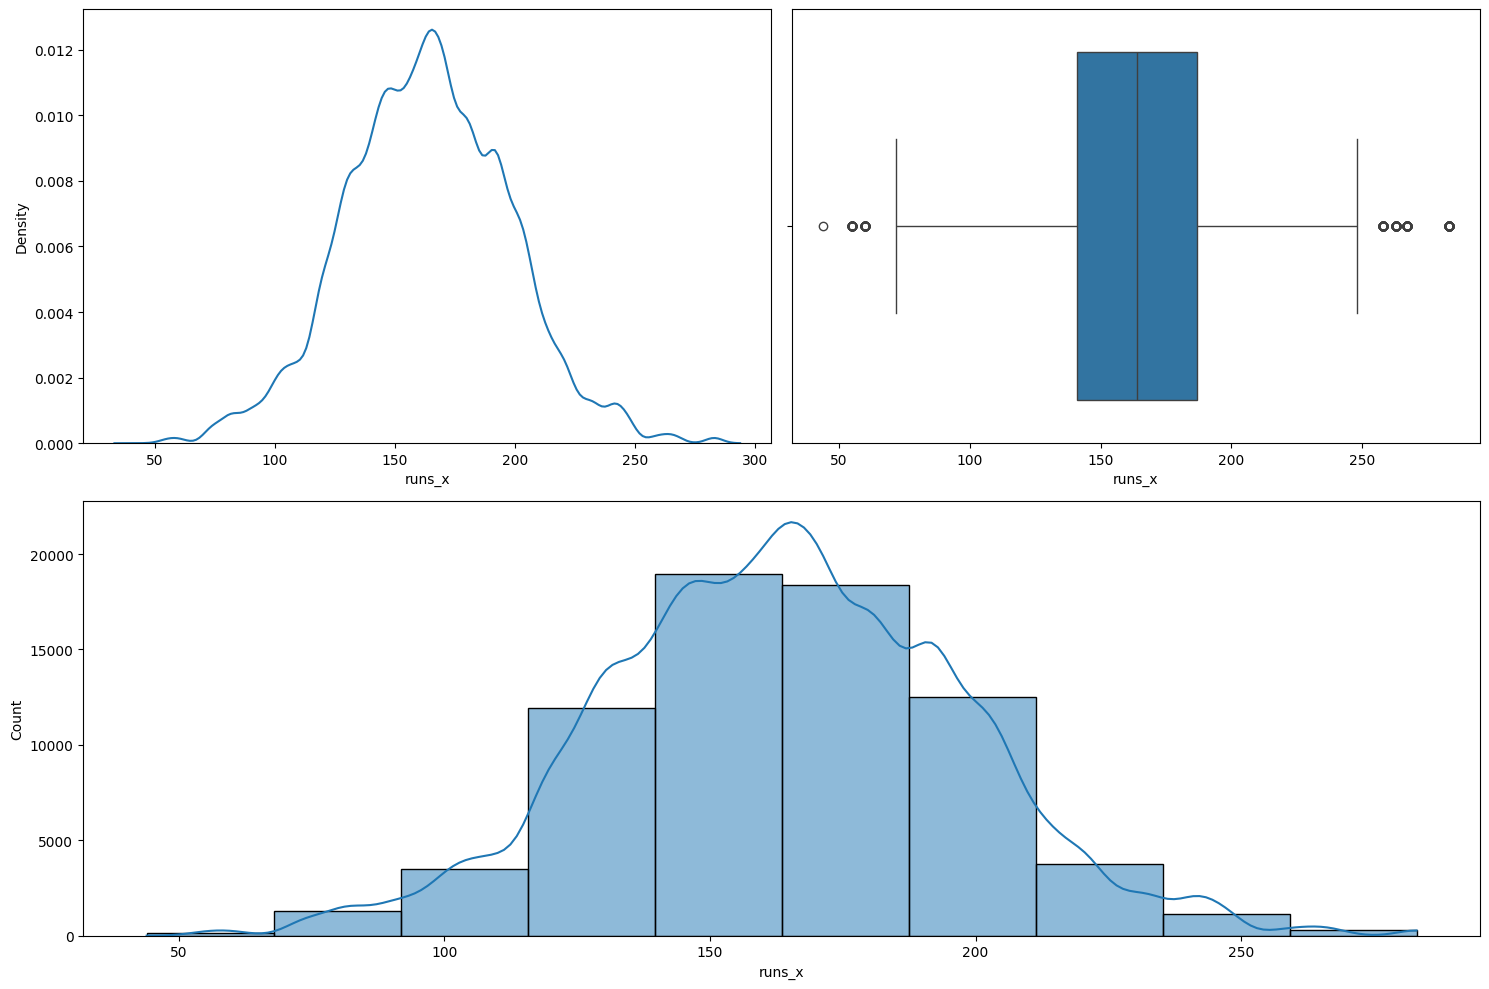

In [ ]:
numerical_analysis(df_final, 'runs_x',bins=10)

In [ ]:
test_for_normality(df_final, 'runs_x')

Jarque Bera Test for Normality
3.296642774805869e-27
Reject the null hypothesis. The data is not normally distributed.


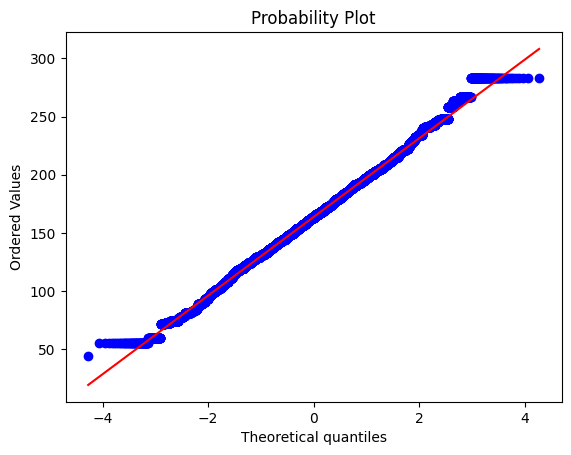

In [ ]:
probplot(df_final['runs_x'], plot=plt)
plt.show()

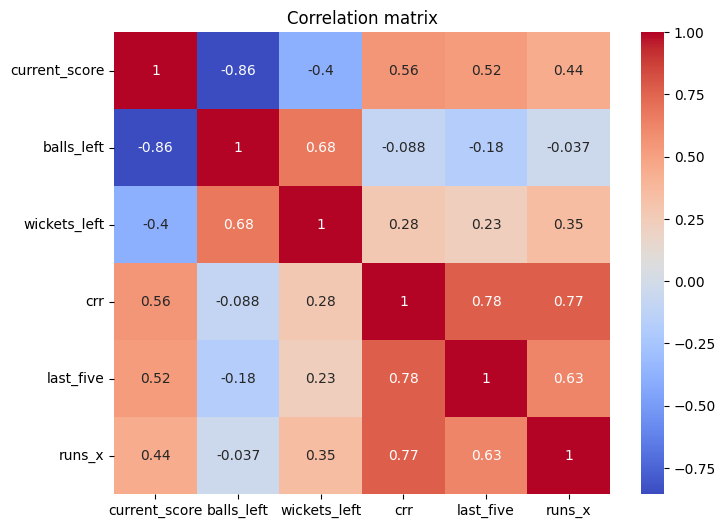

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_final[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [ ]:
df_final.head()

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
0,Bangladesh,Pakistan,Lahore,172,14,6,9.735849,42.0,196
1,Australia,Sri Lanka,Sydney,120,16,7,6.923077,44.0,137
2,Australia,India,Sydney,46,91,9,9.517241,45.0,197
3,Australia,Pakistan,Chandigarh,116,41,7,8.810127,50.0,193
4,New Zealand,Sri Lanka,Colombo,97,33,7,6.689655,37.0,141


## Batting & Bowling Team

,Count,Percentage
batting_team,,
Pakistan,10275,14.29%
India,9167,12.75%
New Zealand,9038,12.57%
Sri Lanka,7514,10.45%
West Indies,7163,9.96%
Australia,7143,9.94%
England,6950,9.67%
South Africa,6834,9.51%
Bangladesh,4809,6.69%


**************************************************
The unique categories in batting_team column are ['Bangladesh', 'Australia', 'New Zealand', 'Pakistan', 'Sri Lanka', 'South Africa', 'West Indies', 'England', 'India', 'Zimbabwe']
**************************************************
The number of categories in batting_team column are 10


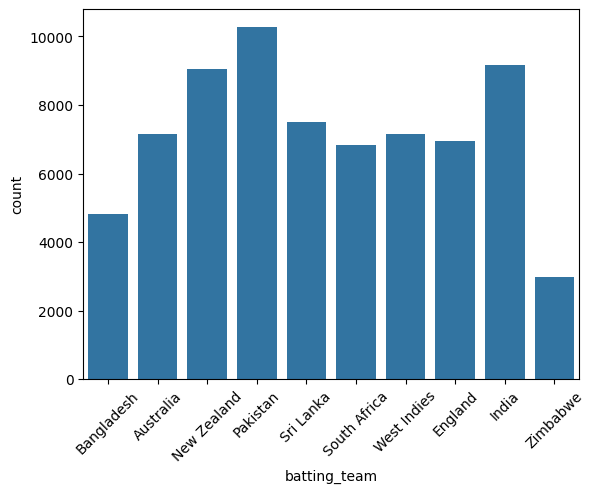

In [ ]:
categorical_analysis(df_final, 'batting_team')

,Count,Percentage
bowling_team,,
England,9540,13.27%
Pakistan,9356,13.02%
Australia,8391,11.67%
New Zealand,7769,10.81%
West Indies,7371,10.25%
Sri Lanka,7055,9.81%
India,6923,9.63%
South Africa,6581,9.15%
Bangladesh,6118,8.51%


**************************************************
The unique categories in bowling_team column are ['Pakistan', 'Sri Lanka', 'India', 'Bangladesh', 'Australia', 'West Indies', 'England', 'South Africa', 'New Zealand', 'Zimbabwe']
**************************************************
The number of categories in bowling_team column are 10


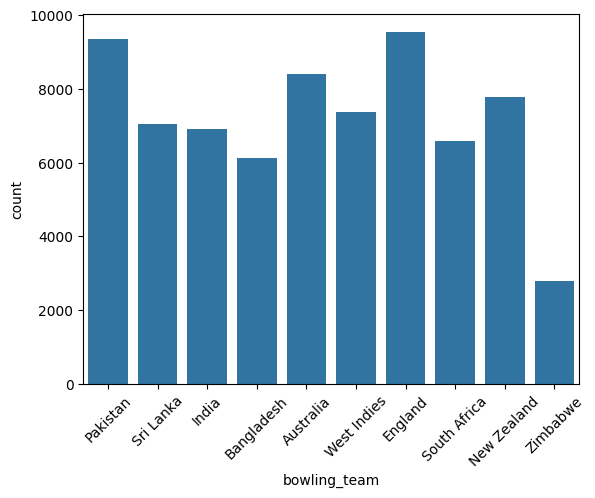

In [ ]:
categorical_analysis(df_final, 'bowling_team')

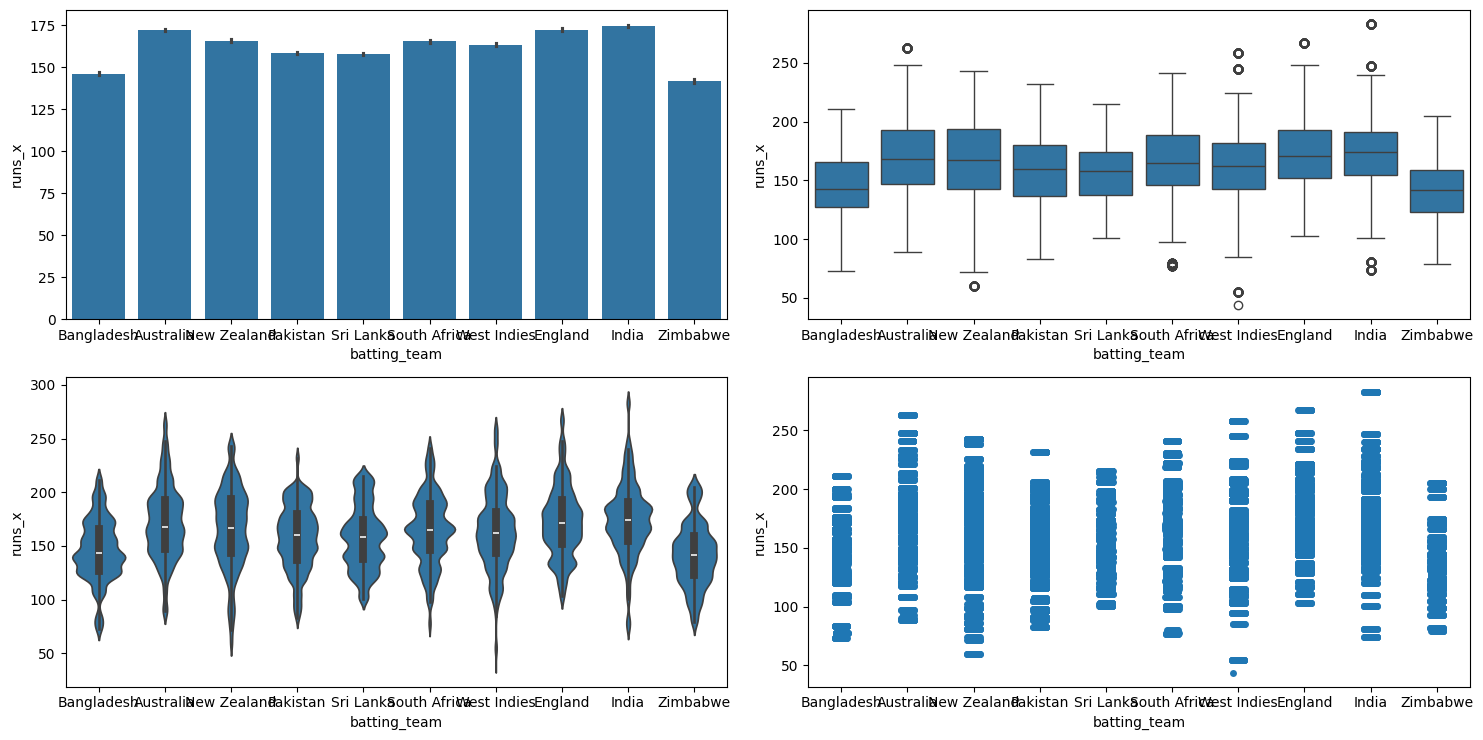

In [ ]:
numerical_categorical_analysis(df_final, 'batting_team', 'runs_x')

FOr Zimbabwe the range of runs is generally less as compared to others and highest in case of India and Australia

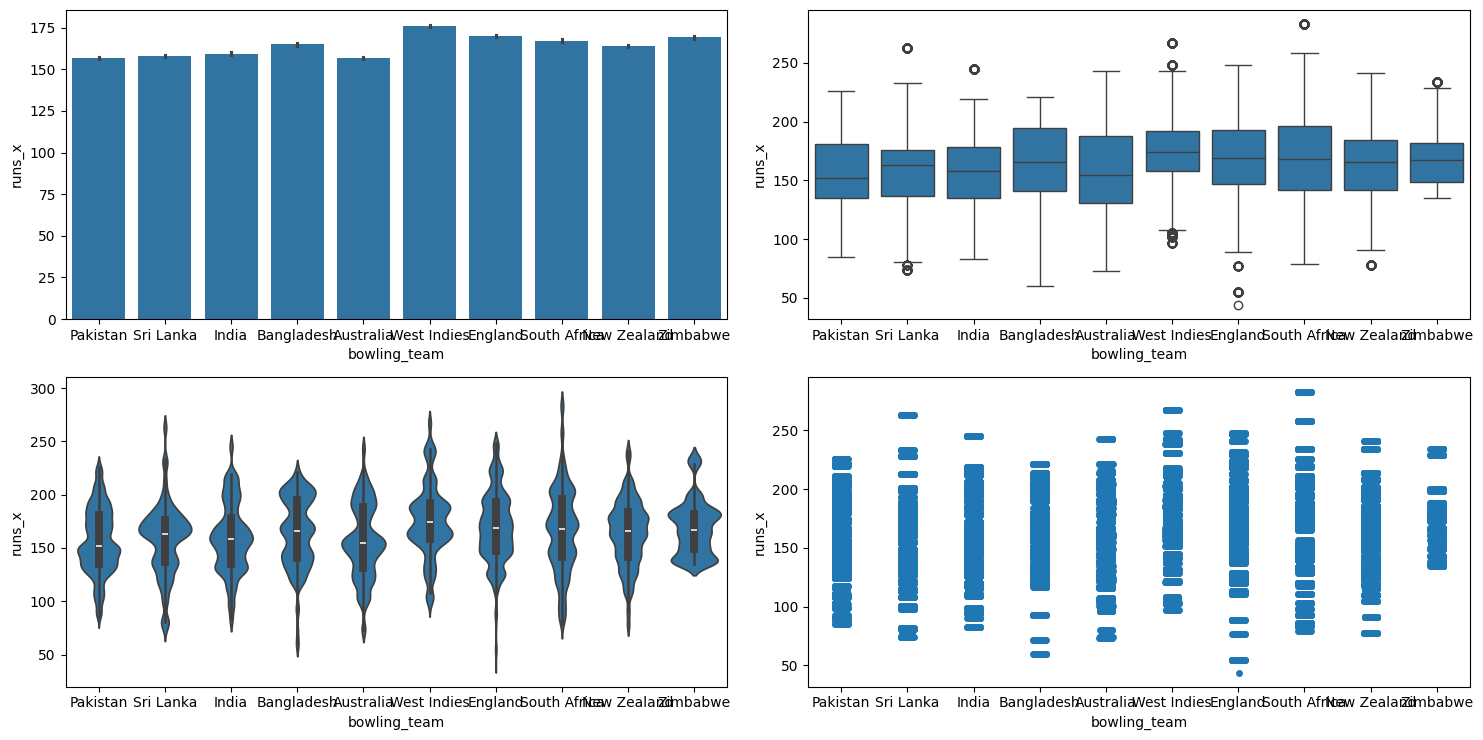

In [ ]:
numerical_categorical_analysis(df_final, 'bowling_team', 'runs_x')

Zimbabwe have always conceeded more than 100 runs in every match

In [ ]:
anova_test(df_final, 'runs_x', 'batting_team')
anova_test(df_final, 'runs_x', 'bowling_team')

0.0
Reject the null hypothesis. There is a significant relationship between runs_x and batting_team.
0.0
Reject the null hypothesis. There is a significant relationship between runs_x and bowling_team.


In [ ]:
df_final.head()

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
0,Bangladesh,Pakistan,Lahore,172,14,6,9.735849,42.0,196
1,Australia,Sri Lanka,Sydney,120,16,7,6.923077,44.0,137
2,Australia,India,Sydney,46,91,9,9.517241,45.0,197
3,Australia,Pakistan,Chandigarh,116,41,7,8.810127,50.0,193
4,New Zealand,Sri Lanka,Colombo,97,33,7,6.689655,37.0,141


## City

In [ ]:
counts = df_final['city'].value_counts()
city_counts = counts.reset_index()
city_counts.columns = ['city', 'count']
city_counts['count'] = pd.to_numeric(city_counts['count'], errors='coerce').fillna(0).astype(int)
city_counts['percentage'] = (city_counts['count'] / city_counts['count'].sum() * 100).round(2)
print("city_counts with percentages:\n", city_counts.head())

display(city_counts)

print("*" * 50)
print(f"The unique cities are: {city_counts['city'].tolist()}")
print("*" * 50)
print(f"Number of unique cities: {df_final['city'].nunique()}")

fig = px.bar(city_counts,
             x='city', y='count',
             text='count',
             title='Number of records per city',
             labels={'count': 'Number of Matches', 'city': 'City'},
             template='plotly_white')

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45, showlegend=False, height=600)
fig.show()

city_counts with percentages:
            city  count  percentage
0       Colombo   4007        5.57
1         Dubai   3729        5.19
2        Harare   3325        4.63
3  Johannesburg   3036        4.22
4        Mirpur   2623        3.65


,city,count,percentage
0,Colombo,4007,5.57
1,Dubai,3729,5.19
2,Harare,3325,4.63
3,Johannesburg,3036,4.22
4,Mirpur,2623,3.65
5,Auckland,2569,3.57
6,Dhaka,2245,3.12
7,Lahore,2186,3.04
8,Sydney,2059,2.86
9,Cape Town,1912,2.66


**************************************************
The unique cities are: ['Colombo', 'Dubai', 'Harare', 'Johannesburg', 'Mirpur', 'Auckland', 'Dhaka', 'Lahore', 'Sydney', 'Cape Town', 'London', 'Melbourne', 'Durban', 'Wellington', 'Pallekele', 'Barbados', 'Centurion', 'Christchurch', 'Abu Dhabi', 'Lauderhill', 'Southampton', 'Mount Maunganui', 'Hamilton', 'Gros Islet', 'Nottingham', 'St Lucia', 'Manchester', 'Karachi', 'Kolkata', 'Cardiff', 'Bridgetown', 'Adelaide', 'Mumbai', 'Brisbane', 'Tarouba', 'Birmingham', "St George's", 'Kandy', 'Sharjah', 'Chittagong', 'Delhi', 'Ahmedabad', 'Rawalpindi', 'Hobart', 'Hambantota', 'Chandigarh', 'Providence', 'Kingston', 'Perth', 'Rajkot', 'Chattogram', 'Trinidad', 'Napier', 'Nagpur', 'Pune', 'Bristol', 'Bangalore', 'Sylhet', 'Dambulla']
**************************************************
Number of unique cities: 59


In [ ]:
anova_test(df_final, 'runs_x', 'city')

0.0
Reject the null hypothesis. There is a significant relationship between runs_x and city.


In [ ]:
df_final.head()

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
0,Bangladesh,Pakistan,Lahore,172,14,6,9.735849,42.0,196
1,Australia,Sri Lanka,Sydney,120,16,7,6.923077,44.0,137
2,Australia,India,Sydney,46,91,9,9.517241,45.0,197
3,Australia,Pakistan,Chandigarh,116,41,7,8.810127,50.0,193
4,New Zealand,Sri Lanka,Colombo,97,33,7,6.689655,37.0,141


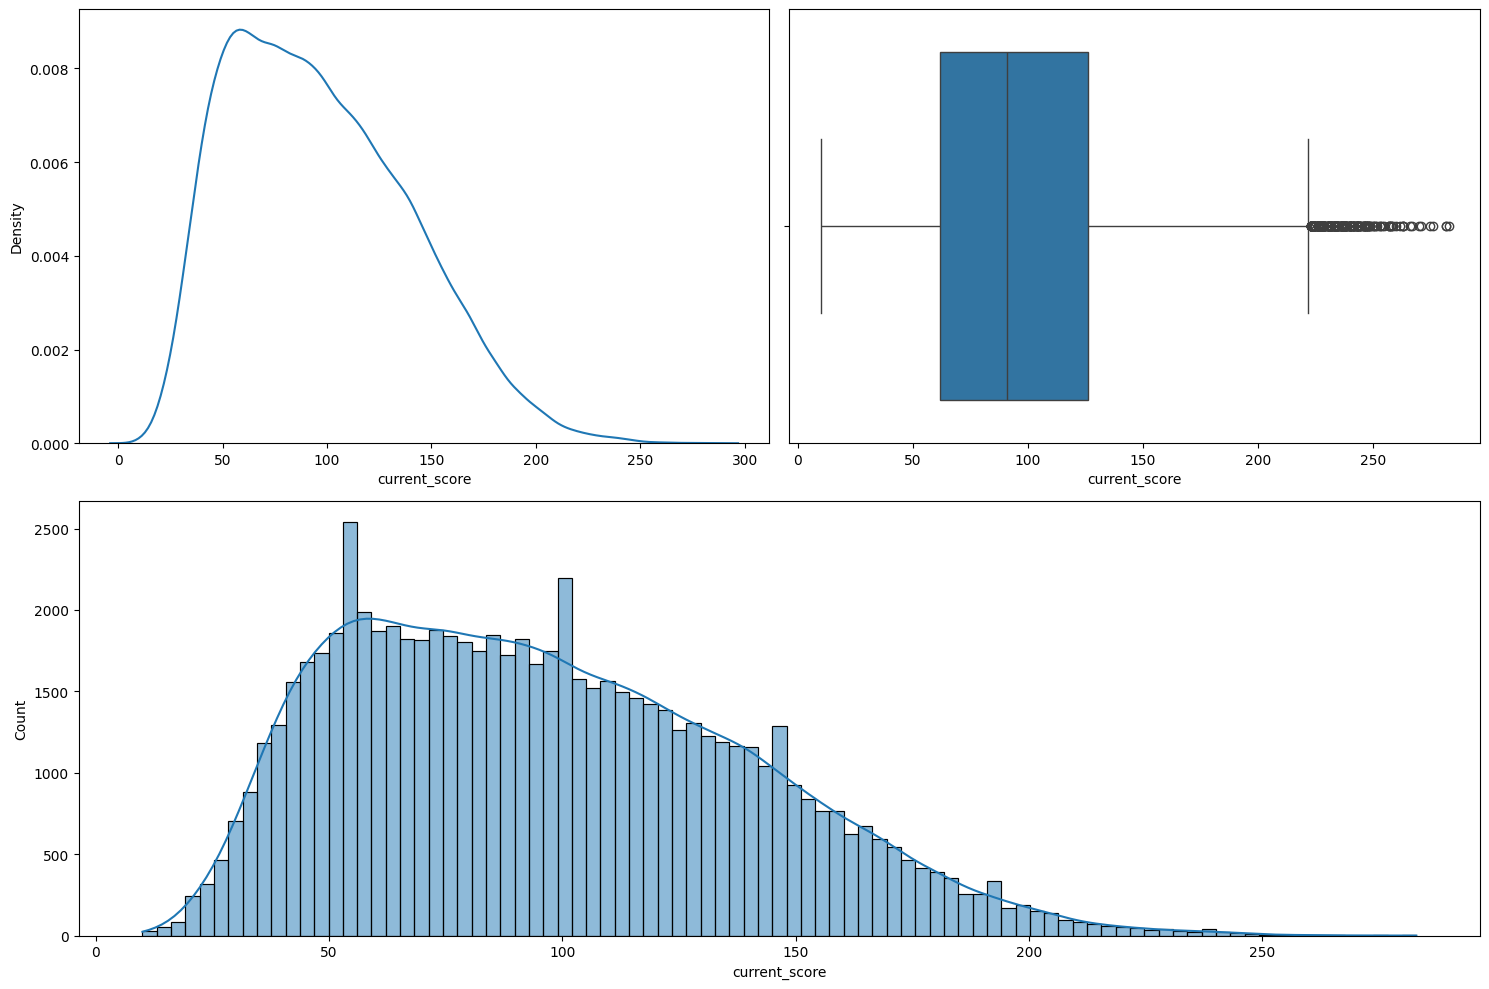

In [ ]:
numerical_analysis(df_final, 'current_score')

In [ ]:
test_for_normality(df_final, 'current_score')

Jarque Bera Test for Normality
0.0
Reject the null hypothesis. The data is not normally distributed.


## Balls and Wicket left

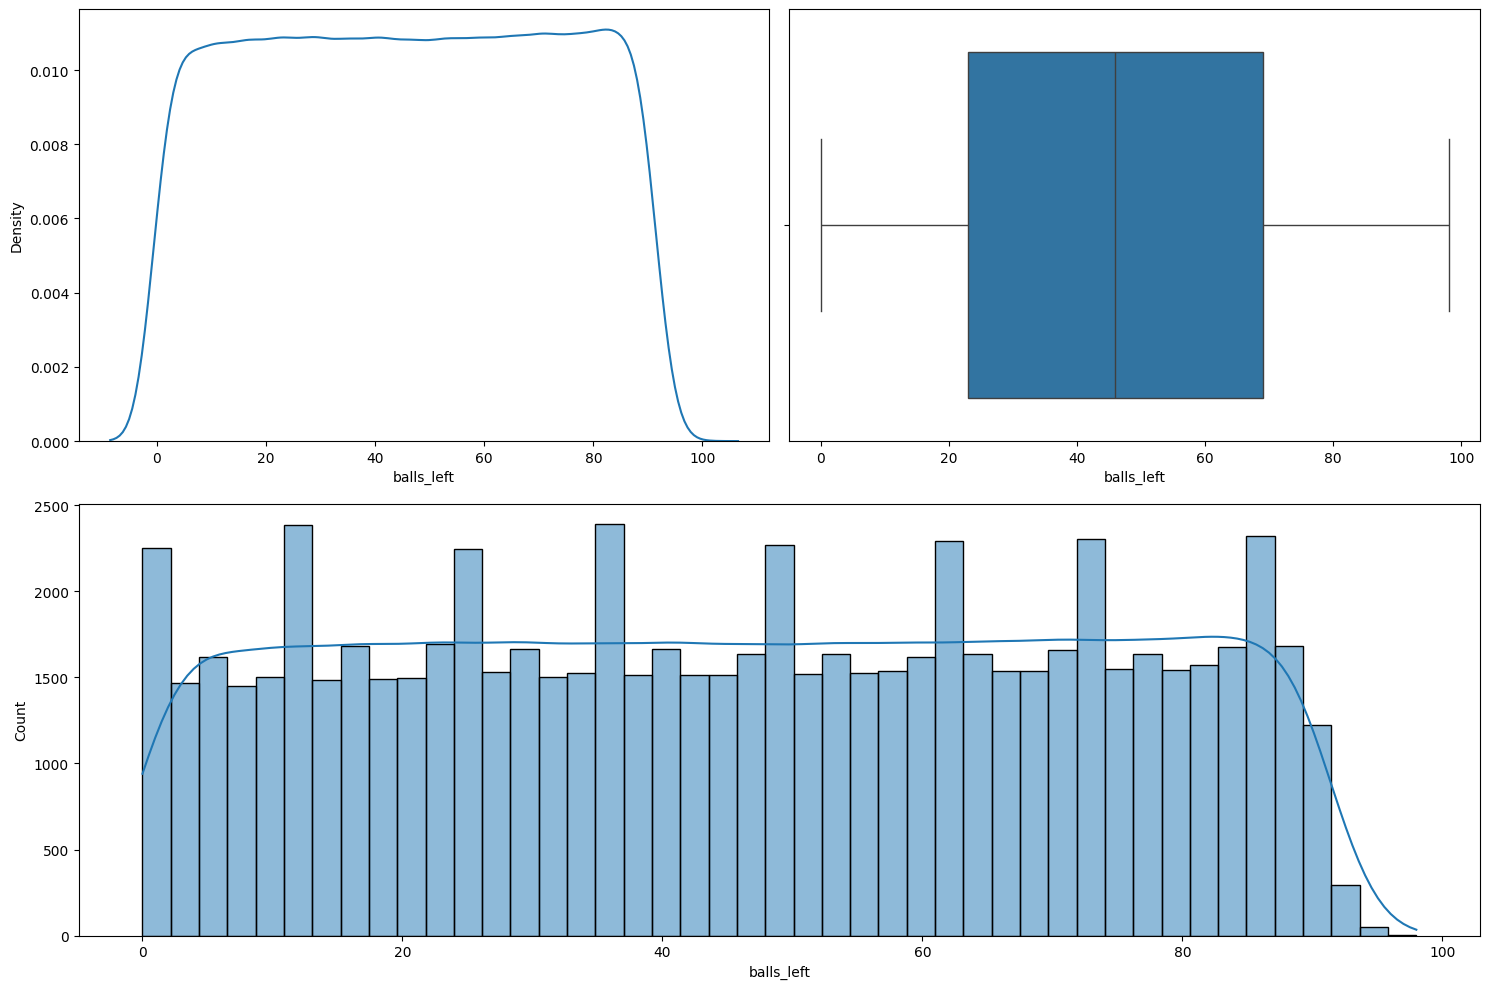

In [ ]:
numerical_analysis(df_final, 'balls_left')

In [ ]:
test_for_normality(df_final, 'balls_left')

Jarque Bera Test for Normality
0.0
Reject the null hypothesis. The data is not normally distributed.


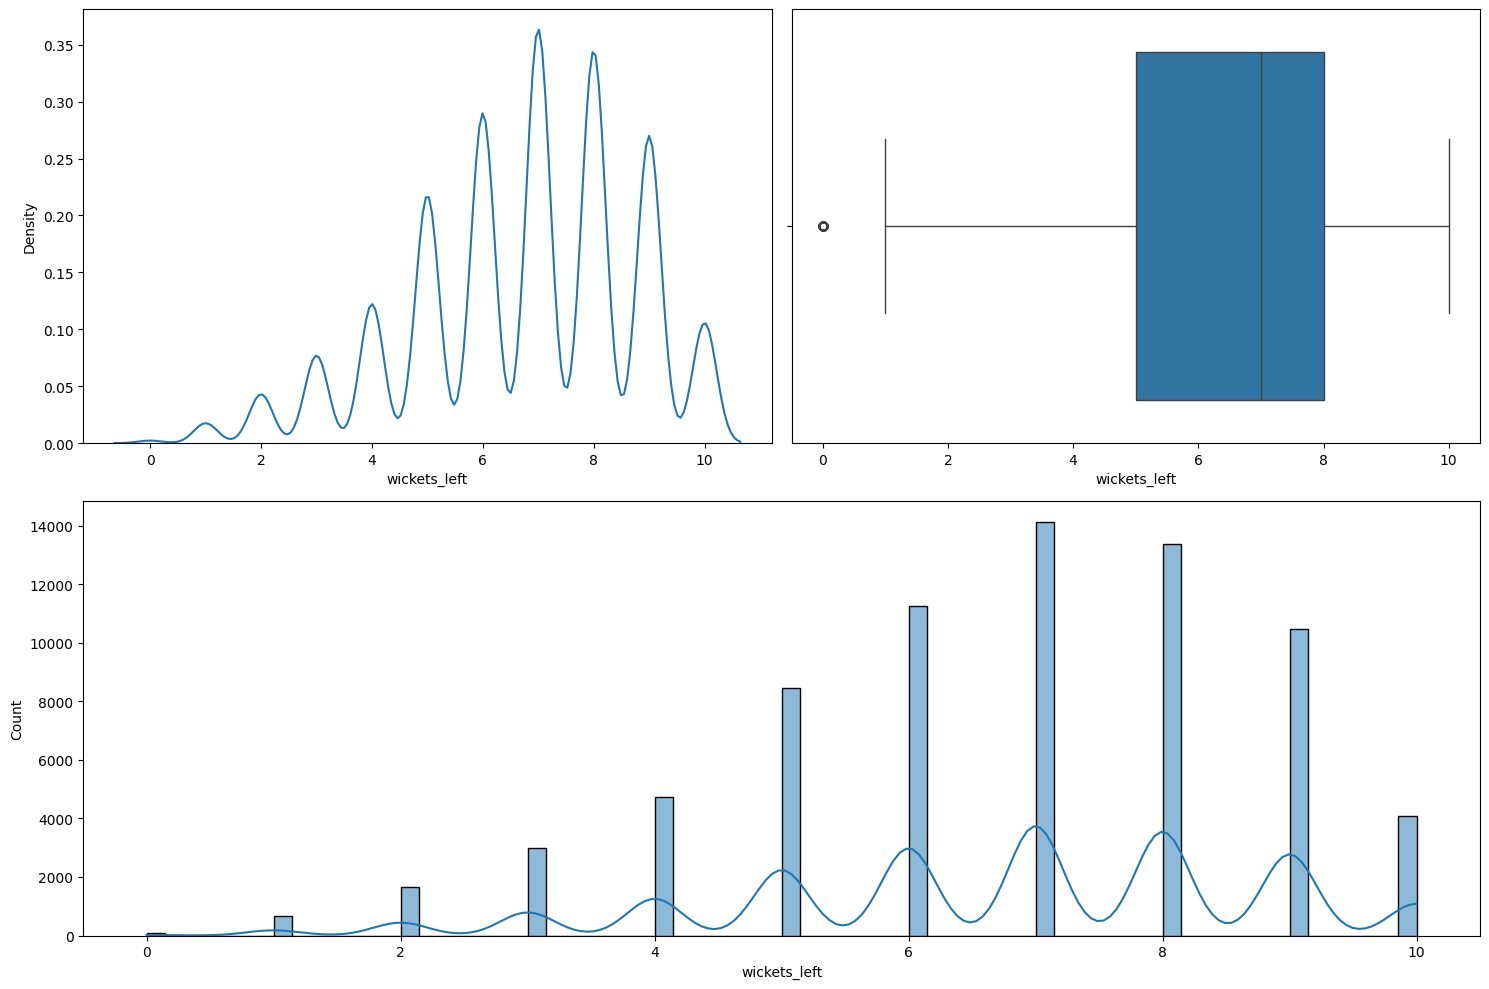

In [ ]:
numerical_analysis(df_final, 'wickets_left')

## CRR

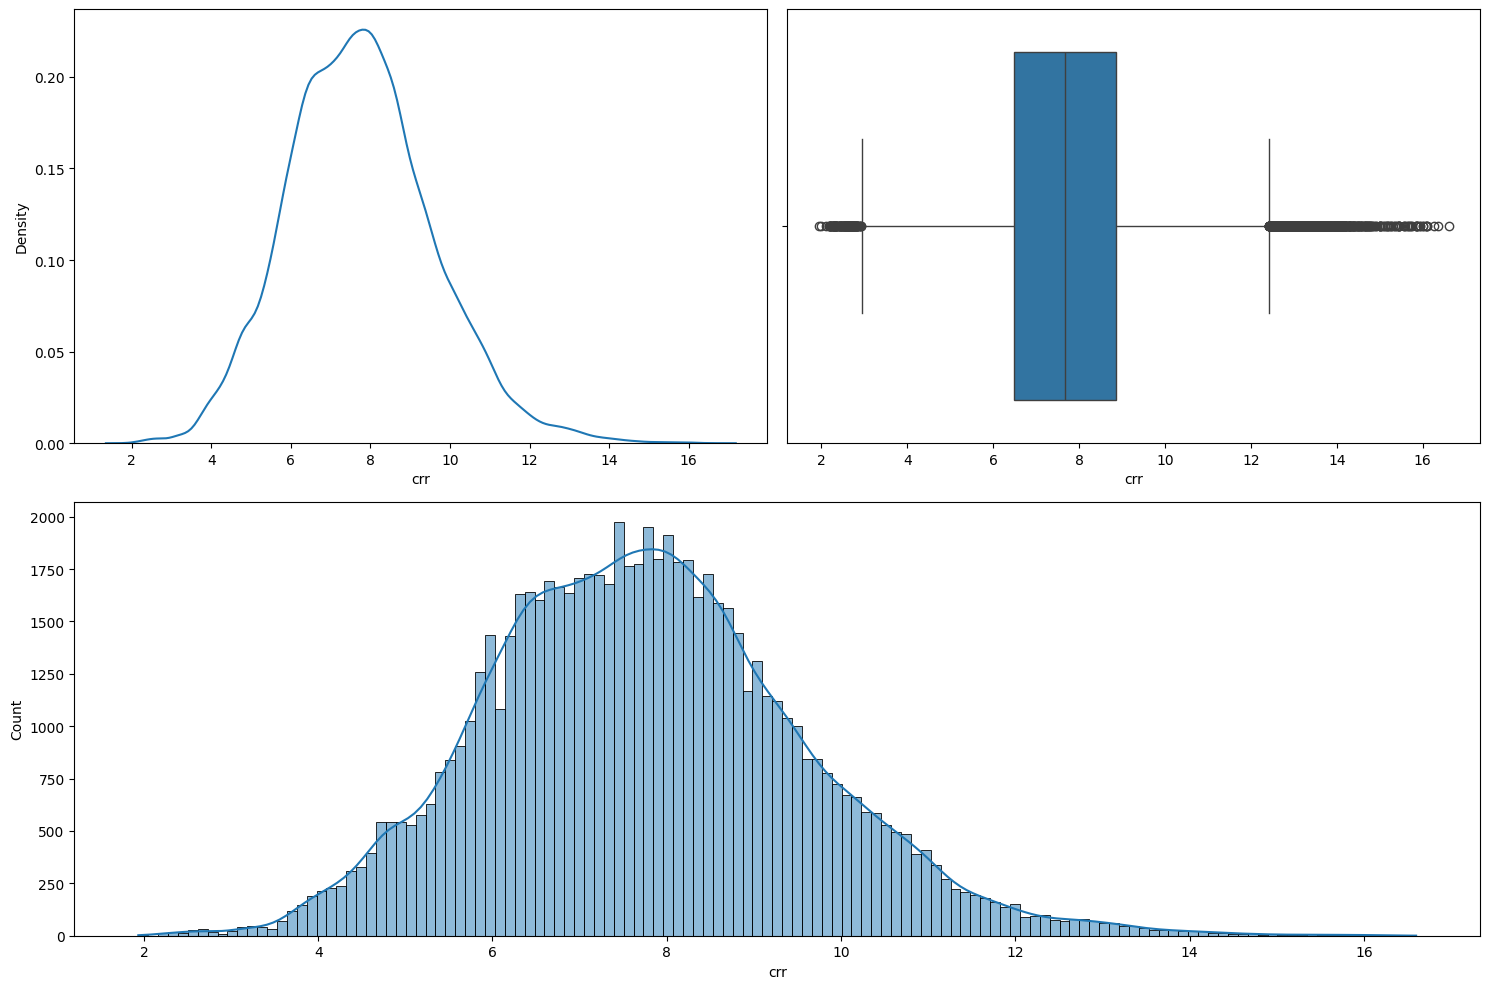

In [ ]:
numerical_analysis(df_final, 'crr')

In [ ]:
test_for_normality(df_final, 'crr')

Jarque Bera Test for Normality
0.0
Reject the null hypothesis. The data is not normally distributed.


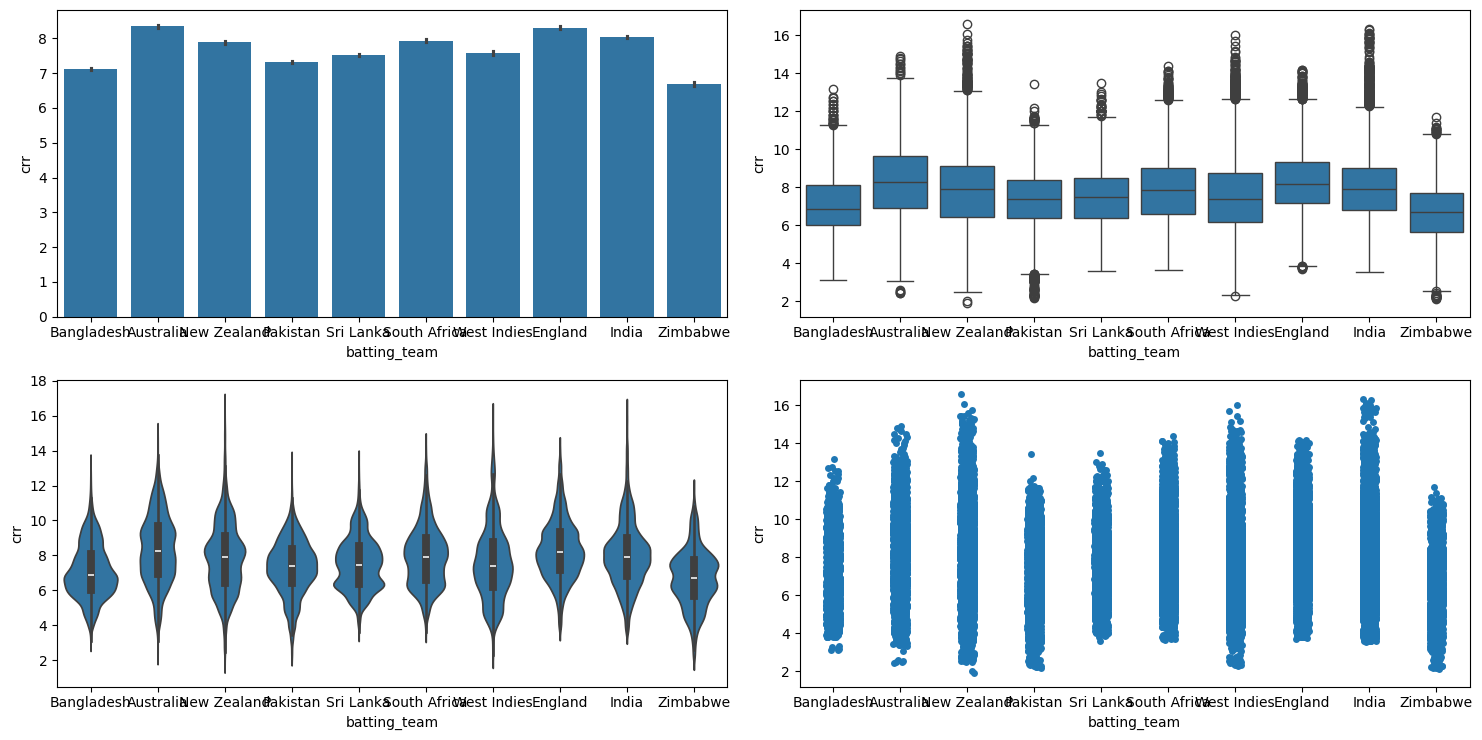

In [ ]:
numerical_categorical_analysis(df_final, 'batting_team', 'crr')

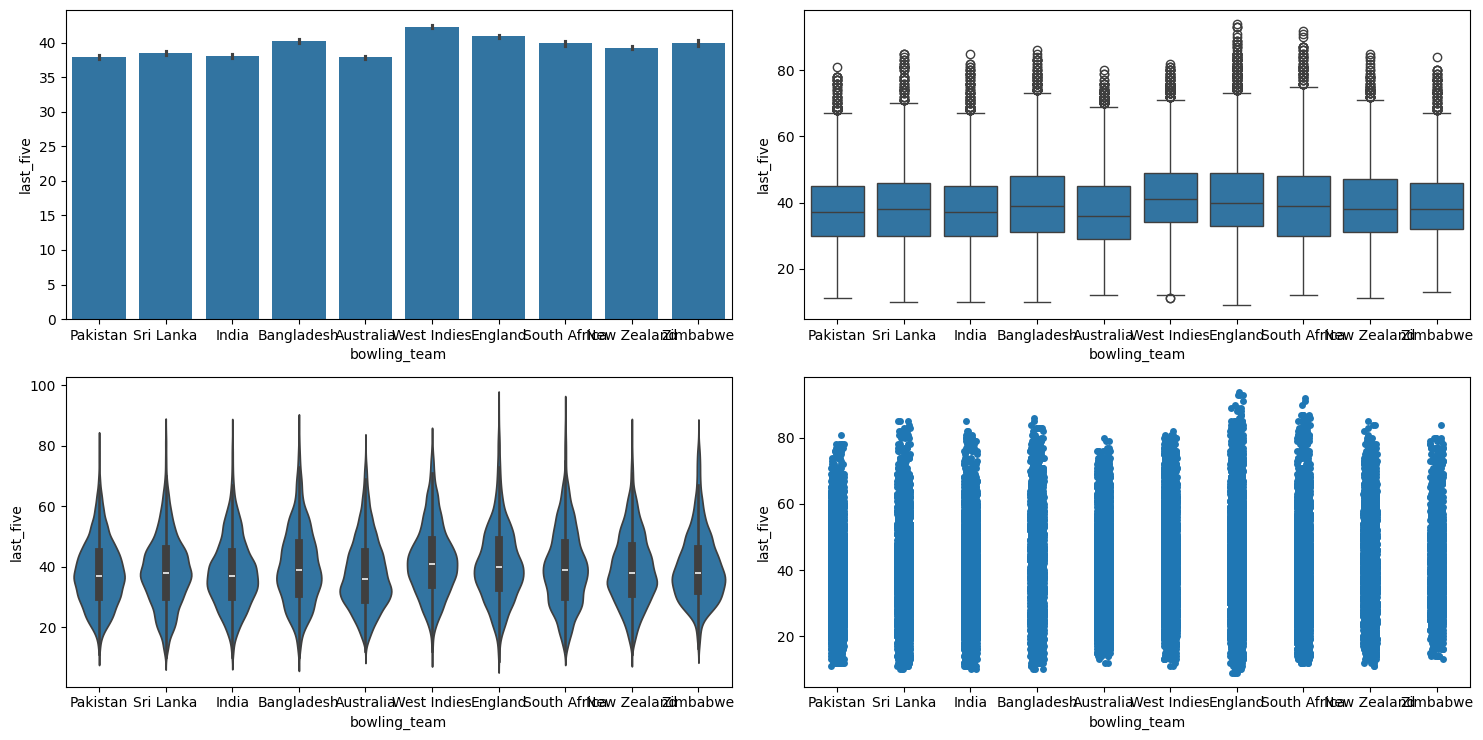

In [ ]:
numerical_categorical_analysis(df_final, 'bowling_team', 'last_five')

In [ ]:
chi_2_test(df_final, 'batting_team', 'bowling_team')

0.0
Reject the null hypothesis. There is a significant association between batting_team and bowling_team.


In [ ]:
chi_2_test(df_final, 'batting_team', 'city')

0.0
Reject the null hypothesis. There is a significant association between batting_team and city.


In [ ]:
anova_test(df_final, 'runs_x', 'batting_team')
anova_test(df_final, 'runs_x', 'bowling_team')
anova_test(df_final, 'runs_x', 'city')

0.0
Reject the null hypothesis. There is a significant relationship between runs_x and batting_team.
0.0
Reject the null hypothesis. There is a significant relationship between runs_x and bowling_team.
0.0
Reject the null hypothesis. There is a significant relationship between runs_x and city.


In [ ]:
fig = px.bar(df_final,
             x='batting_team',
             y='crr',
             color='bowling_team',
             barmode='group',
             height=600,
             width=1200,
             title='CRR by batting_team and bowling_team')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig = px.box(df_final,
             x='batting_team',
             y='crr',
             color='bowling_team',
             height=600,
             width=1200,
             title='Boxplot of CRR by batting_team and bowling_team')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


Output hidden; open in https://colab.research.google.com to view.